# Analyzing LIAR Plus Data Set

## DataSet Visualization

### Loading Training Data Set

In [33]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("LIAR-PLUS-master/dataset/train2.tsv",sep='\t',
                   names=["Statement ID", "Label", "Statement", "Subject", "Speaker", "Speaker Job's title", "State info", 
                          "Party Affiliate", "barely true counts", "false counts", "half true counts", "mostly true counts", "pants on fire counts", "venue", "Extracted Justification"]) 
# Preview the first 5 lines of the loaded data 
data.head()

,Statement ID,Label,Statement,Subject,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


### DataSet Available at [Tariq/LIAR-Plus](https://github.com/Tariq60/LIAR-PLUS)


* Column 1: the ID of the statement ([ID].json).
* Column 2: the label.
* Column 3: the statement.
* Column 4: the subject(s).
* Column 5: the speaker.
* Column 6: the speaker's job title.
* Column 7: the state info.
* Column 8: the party affiliation.
* Columns 9-13: the total credit history count, including the current statement.
    * 9: barely true counts.
    * 10: false counts.
    * 11: half true counts.
    * 12: mostly true counts.
    * 13: pants on fire counts.
* Column 14: the context (venue / location of the speech or statement).
* Column 15: the extracted justification

In [34]:
print(data.dtypes)
print(data.shape)

Statement ID                object
Label                       object
Statement                   object
Subject                     object
Speaker                     object
Speaker Job's title         object
State info                  object
Party Affiliate             object
barely true counts         float64
false counts               float64
half true counts           float64
mostly true counts         float64
pants on fire counts       float64
venue                       object
Extracted Justification     object
dtype: object
(10240, 15)


In [35]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
test_data = pd.read_csv("LIAR-PLUS-master/dataset/train2.tsv",sep='\t',
                   names=["Statement ID", "Label", "Statement", "Subject", "Speaker", "Speaker Job's title", "State info", 
                          "Party Affiliate", "barely true counts", "false counts", "half true counts", "mostly true counts", "pants on fire counts", "venue", "Extracted Justification"]) 
# Preview the first 5 lines of the loaded data 
test_data.head()


,Statement ID,Label,Statement,Subject,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [5]:
data["Label"].head(20)

0           false
1       half-true
2     mostly-true
3           false
4       half-true
5            true
6     barely-true
7       half-true
8       half-true
9     mostly-true
10    mostly-true
11      half-true
12          false
13    mostly-true
14    barely-true
15      half-true
16           true
17    barely-true
18      half-true
19    mostly-true
Name: Label, dtype: object

### Binary Classification

As we see from the data its a multi-class data having 6 classes namely "false", ""mostly-true", "barely-true", "half-true", "true" , "pants-fire"

For the purpose of Binary Classification, we simply consider labels  ""mostly-true", "barely-true", "half-true", "true" as "true" and "false" "pants-fire" as false

#### Converting Training Data to Binary Labelled Data

In [6]:

bin_data = data

In [7]:
bin_data['Label'] = bin_data['Label'].replace(['false', 'pants-fire'], 0)

In [8]:
bin_data['Label'] = bin_data['Label'].replace(['mostly-true', 'half-true', 'barely-true', 'true'], 1)

In [9]:
bin_data['Label'].head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Label, dtype: int64

#### Converting Test Data to Binary Labelled Data

In [10]:
test_bin_data = test_data

In [11]:
test_bin_data['Label'] = test_bin_data['Label'].replace(['false', 'pants-fire'], 0)
test_bin_data['Label'] = test_bin_data['Label'].replace(['mostly-true', 'half-true', 'barely-true', 'true'], 1)


In [12]:
def evaluate(model, test_set, model_name):
    
    y_pred = model.predict(test_set['Subject'].values.astype('U'))
    y_true = test_set['Label']
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print('::::: Evaluation Results :::: {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))
    return accuracy

In [92]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)

from sklearn.pipeline import Pipeline


### Linear Regression

In [15]:
lr_pipeline = Pipeline([
    ('lrCV', CountVectorizer(stop_words="english", lowercase=True, ngram_range=(1, 1))),
    ('lr_clf', LogisticRegression(C=0.0001,random_state=42, n_jobs=-1))
])

In [16]:
lr_pipeline.fit(bin_data['Subject'].values.astype('U'), bin_data['Label'])


C:\Users\pratik\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Pipeline(memory=None,
     steps=[('lrCV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [17]:
lr_acc = evaluate(lr_pipeline, test_bin_data, 'Logistic Regression')


::::: Evaluation Results :::: Logistic Regression
Accuracy is: 0.7232421875
F1 score is: 0.839397030488
Precision score is: 0.7232421875
Recall score is: 1.0


### Support Vector Machine

In [18]:
from sklearn.feature_extraction import text
from sklearn.svm import SVC


In [19]:
svm_pipeline = Pipeline([
    ('svm_CV', CountVectorizer(stop_words="english", lowercase=False, ngram_range=(1, 1))),
    ('svm_clf', SVC(random_state=42, gamma=1.0, kernel='rbf'))
])

In [20]:
svm_pipeline.fit(bin_data['Subject'].values.astype('U'), bin_data['Label'])


Pipeline(memory=None,
     steps=[('svm_CV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [21]:
svm_acc = evaluate(svm_pipeline, test_bin_data, 'SVM Count Vectorizer')


::::: Evaluation Results :::: SVM Count Vectorizer
Accuracy is: 0.80400390625
F1 score is: 0.879336259244
Precision score is: 0.792565297496
Recall score is: 0.987442614097


### Naive Bayes Classification


In [22]:
from sklearn.naive_bayes import MultinomialNB


In [23]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(stop_words="english", lowercase=True, ngram_range=(1, 10))),
    ('nb_clf', MultinomialNB(alpha=6.8))
])

In [24]:
nb_pipeline.fit(bin_data['Subject'].values.astype('U'), bin_data['Label'])


Pipeline(memory=None,
     steps=[('nb_CV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 10), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb_clf', MultinomialNB(alpha=6.8, class_prior=None, fit_prior=True))])

In [25]:
nb_acc = evaluate(nb_pipeline, test_bin_data, 'Naive Bayes Count Vectorizer')


::::: Evaluation Results :::: Naive Bayes Count Vectorizer
Accuracy is: 0.7287109375
F1 score is: 0.842015468608
Precision score is: 0.727353114561
Recall score is: 0.999594923035


### Random Forest Classifier

In [26]:
rf_pipeline = Pipeline([
    ('rf_CV', CountVectorizer(stop_words="english", lowercase=False, ngram_range=(1, 1))),
    ('rf_clf', RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42))
])

In [30]:
rf_pipeline.fit(bin_data['Subject'].values.astype('U'), bin_data['Label'])


Pipeline(memory=None,
     steps=[('rf_CV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
   ...imators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [32]:
rf_acc = evaluate(rf_pipeline, test_data, 'Random Forest')


::::: Evaluation Results :::: Random Forest
Accuracy is: 0.72685546875
F1 score is: 0.841106629552
Precision score is: 0.725997842503
Recall score is: 0.999594923035


## Multi Classification

In [36]:
def accuracy(model, test_set, model_name):
    
    y_pred = model.predict(test_set['Subject'].values.astype('U'))
    y_true = test_set['Label']
    #f1 = f1_score(y_true, y_pred)
    #precision = precision_score(y_true, y_pred)
    #recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print('::::: Evaluation Results :::: {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    return accuracy

### Linear Regression

In [37]:
lr_pipeline.fit(data['Subject'].values.astype('U'), data['Label'])


Pipeline(memory=None,
     steps=[('lrCV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [38]:
lr_mc_acc = accuracy(lr_pipeline, test_data, 'Logistic Regression ')


::::: Evaluation Results :::: Logistic Regression 
Accuracy is: 0.20732421875


### Support Vector Machine


In [39]:
svm_pipeline.fit(data['Subject'].values.astype('U'), data['Label'])


Pipeline(memory=None,
     steps=[('svm_CV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [40]:
svm_mc_acc = accuracy(svm_pipeline, test_data, 'SVM Count Vectorizer')


::::: Evaluation Results :::: SVM Count Vectorizer
Accuracy is: 0.5267578125


### Naive Bayes


In [41]:
nb_pipeline.fit(data['Subject'].values.astype('U'), data['Label'])


Pipeline(memory=None,
     steps=[('nb_CV', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 10), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb_clf', MultinomialNB(alpha=6.8, class_prior=None, fit_prior=True))])

In [42]:
nb_mc_acc = accuracy(nb_pipeline, test_data, 'Naive Bayes')


::::: Evaluation Results :::: Naive Bayes
Accuracy is: 0.3337890625


## Classification Results

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
x_bin = ["LR", "SVM", "NB"]
y_bin = [lr_acc,svm_acc,nb_acc]

Text(0.5,1,'Binary Classification Accuracy')

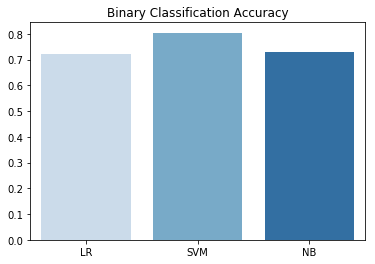

In [54]:
sns.barplot(x_bin, y_bin, palette="Blues")
plt.title("Binary Classification Accuracy")

In [55]:
x_mc = ["LR", "SVM", "NB"]
y_mc = [lr_mc_acc,svm_mc_acc,nb_mc_acc]

Text(0.5,1,'Multi Classification Accuracy')

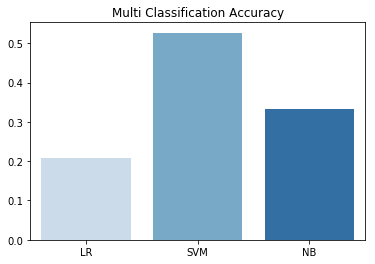

In [56]:
sns.barplot(x_mc, y_mc, palette="Blues")
plt.title("Multi Classification Accuracy")

As we see binary classification gives better results since we only want to label a statement as either true or false.

In case of six way classification, it gives worse results, due to the fact we have more restrictions in classifying within the 
6 categories. Hence we need to analyse specific features to build a stronger classifier.

---------------------------------------

## Analyzing Feature Set from the Data

Some of the features that define the data set include the Subject of the Statement, the Speaker of the statement, the speaker's job and the party affiliation.

### Exploring the Subject / Topic Feature

The feature subject may be interesting in determining the truthfulness of a statement.

First, we see how many unique subjects or topics are present in the data and how the truthfulness of the statement depends on 
the topic of a statement.

In [57]:
data.columns

Index([u'Statement ID', u'Label', u'Statement', u'Subject', u'Speaker',
       u'Speaker Job's title', u'State info', u'Party Affiliate',
       u'barely true counts', u'false counts', u'half true counts',
       u'mostly true counts', u'pants on fire counts', u'venue',
       u'Extracted Justification'],
      dtype='object')

In [58]:
def topic_data(df):
    
    df = df.copy()
    df["Subject"] = df["Subject"].apply(lambda x : str(x).lower().split(","))
    ## Create a dataframe of all subjects
    subjects = df.Subject.apply(pd.Series)
    cols = list(df.columns.values)
    cols.remove("Subject")
   
    df = subjects.merge(df, right_index = True, left_index = True) \
        .drop(["Subject"], axis = 1)
        
       
    lf = pd.melt(df, id_vars = cols, value_name = "Subject") \
        .drop("variable", axis = 1) \
    
    return lf

In [59]:
df_raw = data.sample(frac=1).reset_index()
topic_data = topic_data(df_raw)

set_of_subjects = set(topic_data['Subject'])
    
print("Total %d unique subjects" % len(set_of_subjects))
print("Sample subjects:\n", list(set_of_subjects)[:10])

Total 144 unique subjects
('Sample subjects:\n', [nan, 'hunger', 'trade', 'welfare', 'homeland-security', 'children', 'occupy-wall-street', 'islam', 'retirement', 'workers'])


Finding unique subjects occuring more than 200 times

In [61]:
subject_counts = topic_data.groupby("Subject").count()
subjects_200 = subject_counts.where(subject_counts['Statement ID'] > 200).dropna().index
topic_data = topic_data[topic_data['Subject'].isin(subjects_200)]


In [90]:
topic_data.head(5)

,index,Statement ID,Label,Statement,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification,Subject
0,1279,6291.json,half-true,Unemployment among Oregon high school graduate...,cascade-policy-institute,NaN,NaN,organization,0.0,0.0,1.0,0.0,0.0,a website,"In every data set we checked, Oregons youth un...",economy
1,4183,5385.json,true,Says Scott Walker enacted the biggest cuts to ...,kathleen-falk,NaN,NaN,democrat,1.0,3.0,3.0,1.0,0.0,a speech announcing her candidacy,The senator could also be right about illegal ...,education
3,5969,2892.json,true,Said Republicans made historic gains in state ...,national-review,NaN,NaN,none,0.0,0.0,0.0,0.0,0.0,National Review Online,The bulk of Obama's professional experience is...,elections
4,7146,13399.json,barely-true,Says that hes responsible for Austinincluding ...,jimmy-flannigan,Small business owner,Texas,none,1.0,0.0,0.0,0.0,0.0,an Austin Monitor interview that day plus foru...,"Club for Growth says Trump promises ""to take c...",candidates-biography
5,8094,3556.json,mostly-true,Says an average of $4 billion is added to the ...,saxby-chambliss,U.S. Senator,Georgia,republican,1.0,1.0,3.0,4.0,1.0,an op-ed,And the Justice Department has a $15 million l...,federal-budget


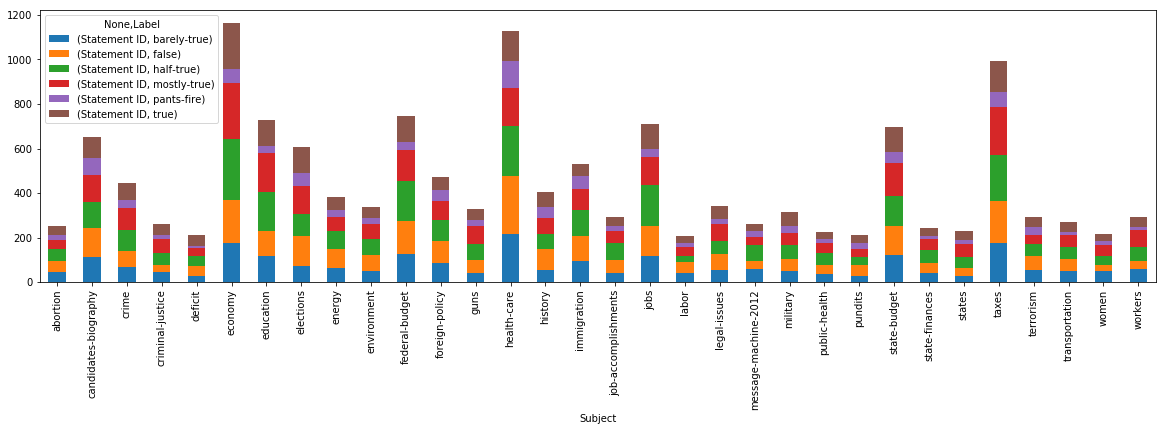

In [62]:
count_df = topic_data.groupby(["Subject","Label"]).agg({"Statement ID" : "count"})
count_df.unstack().plot(kind='bar', stacked=True, figsize=(20,5))


Here, we find a distribution showing the relation between the truthfulness of a statement with its corresponding topic

### Exploring the Speaker Feature

The feature speaker may also contribute significantly in determining the truthfulness of a statement.

First, we see how many unique speakers are there in the data.

Next we wish to see which speakers are more likely to make a false claim and which speakers are most truthful.

In [63]:
speakers_df = df_raw.copy()
speakers = speakers_df['Speaker'].unique()
print("Total %d unique speakers" % len(speakers))
print("Sample speakers:\n", speakers[:10])

Total 2911 unique speakers
('Sample speakers:\n', array(['cascade-policy-institute', 'kathleen-falk', 'glenn-beck',
       'national-review', 'jimmy-flannigan', 'saxby-chambliss',
       'josh-mandel', 'todd-tiahrt', 'ron-kind', 'barack-obama'],
      dtype=object))


In [64]:
speakers_cts = speakers_df.groupby("Speaker").Statement.count()
speakers = speakers_cts[speakers_cts > 20]
print("Total %d unique speakers who appear more than 20 times within the dataset" % len(speakers))
print("Sample speakers:\n", speakers[:10])

Total 65 unique speakers who appear more than 20 times within the dataset
('Sample speakers:\n', Speaker
alan-grayson      30
barack-obama     488
ben-carson        25
bernie-s          88
bill-clinton      31
bill-nelson       23
blog-posting      59
bob-mcdonnell     37
chain-email      142
charlie-crist     70
Name: Statement, dtype: int64)


In [65]:
speakers_df = speakers_df[speakers_df['Speaker'].isin(speakers.keys())]


In [89]:
speakers_df.head(5)

,index,Statement ID,Label,Statement,Subject,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification
2,5163,10876.json,barely-true,Says Hillary Clinton makes more per hour at a ...,"income,wealth,workers",glenn-beck,NaN,NaN,none,5.0,7.0,7.0,2.0,6.0,a segment on his radio show,"Obama said the United States has ""recovered fa..."
6,9401,7048.json,false,Says that Sherrod Brown is an Obama rubber sta...,"cap-and-trade,climate-change,environment,votin...",josh-mandel,Ohio treasurer,Ohio,republican,4.0,5.0,4.0,5.0,6.0,a radio ad,"Graham said that ""since 1990, in inflation-adj..."
9,5782,13451.json,half-true,The list of voters that North Carolina Republi...,elections,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a rally in North Carolina,And almost all of the imagery highlights the s...
10,8669,6492.json,true,"Says under Wisconsin law, he cannot remove his...",elections,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,a television interview,Webb says the U. S. has 5 percent of the worl...
12,88,767.json,barely-true,"Sen. McCain's tax plan provides ""virtually not...",taxes,joe-biden,U.S. senator,Delaware,democrat,11.0,10.0,21.0,16.0,4.0,vice presidential debate in St. Louis,Its more generous exemption for dependents and...


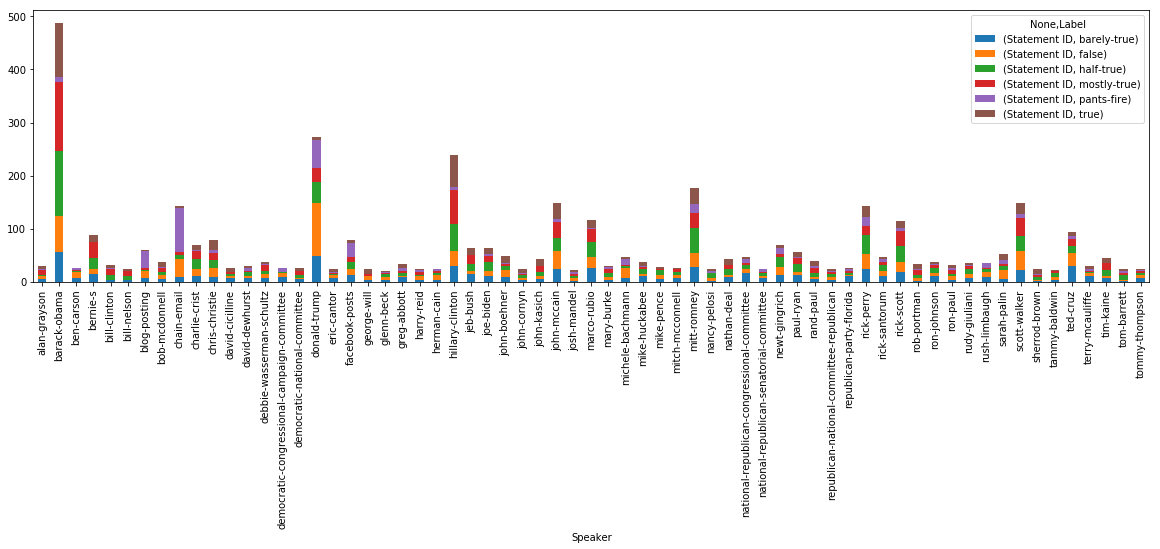

In [66]:
count_speakers = speakers_df.groupby(["Speaker","Label"]).agg({"Statement ID" : "count"})
count_speakers.unstack().plot(kind='bar', stacked=True, figsize=(20,5))

For example, an interesting feature from the distribution is that **Donal Trump** is always making *false claims* most of the time. [ "true" label is very less]

### Exploring the Job Feature

The feature **Job** may also contribute significantly in determining the truthfulness of a statement.

Some speakers belonging to particular job may make more false claims while others may make more truthful claims

In [67]:
jobs_df = data.copy()
jobs = jobs_df['Speaker Job\'s title'].unique()
print("Total %d unique jobs" % len(jobs))
print("Sample jobs:\n", jobs[:10])

Total 1185 unique jobs
('Sample jobs:\n', array(['State representative', 'State delegate', 'President', nan,
       'Wisconsin Assembly speaker', 'U.S. Senator', 'Former governor',
       'Columnist', 'U.S. House member -- 4th District',
       'Treasury secretary '], dtype=object))


In [87]:
job_cts = jobs_df.groupby("Speaker Job\'s title").Statement.count()
jobs = job_cts[job_cts > 20]
print("There are %d unique jobs who appear more than 20 times within the dataset" % len(jobs))
print("Some sample jobs include:\n", jobs[:5])


There are 52 unique jobs who appear more than 20 times within the dataset
('Some sample jobs include:\n', Speaker Job's title
Attorney                                   81
Attorney General                           33
Businessman                                34
Candidate for U.S. Senate and physician    39
Co-host on CNN's "Crossfire"               73
Name: Statement, dtype: int64)


In [88]:
jobs

Speaker Job's title
Attorney                                     81
Attorney General                             33
Businessman                                  34
Candidate for U.S. Senate and physician      39
Co-host on CNN's "Crossfire"                 73
Columnist                                    25
Congressman                                  80
Congresswoman                                50
Former governor                             176
Governor                                    391
Governor of New Jersey                       78
Governor of Ohio as of Jan. 10, 2011         43
House Majority Leader                        32
House Minority Leader                        23
Lawyer                                       28
Lieutenant governor                          33
Madison school board member                  29
Mayor of Milwaukee                           23
Milwaukee County Executive                  149
Ohio treasurer                               24
President           

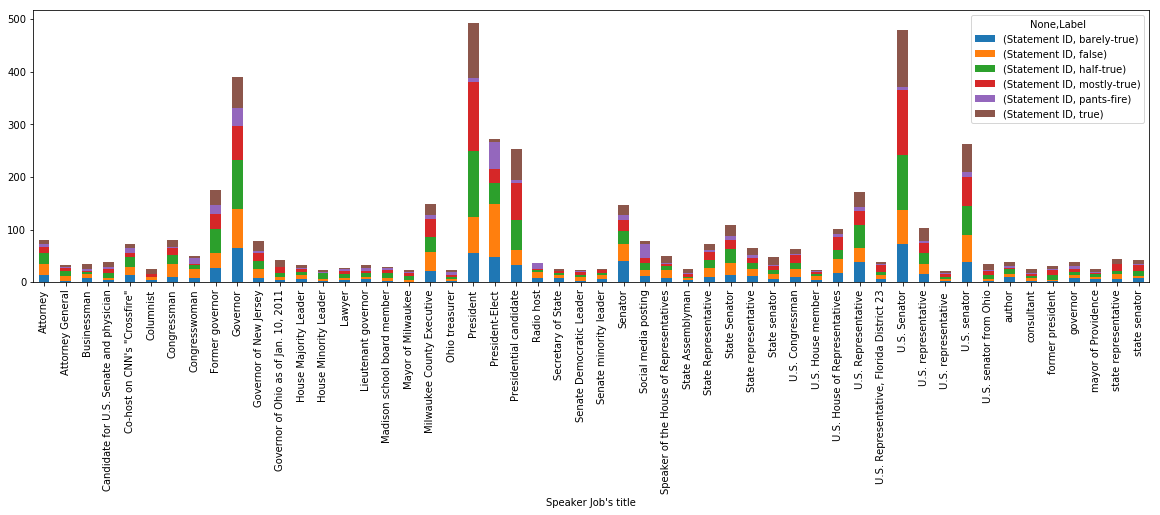

In [84]:
jobs_df = jobs_df[jobs_df['Speaker Job\'s title'].isin(jobs.keys())]

jobs_count = jobs_df.groupby(["Speaker Job\'s title","Label"]).agg({"Statement ID" : "count"})
jobs_count.unstack().plot(kind='bar', stacked=True, figsize=(20,5))

Interestingly **President-Elect** or president to be elected has the higher number of cases where he/she makes a false claim.

### Exploring the Party Affiliation Feature

Members of a particular party may be more prone to making false claims than others.
Hence an important step is to study such a relation between party affiliation and the truthfulness of their claims.

In [70]:
parties_df = df_raw.copy()
parties = jobs_df['Party Affiliate'].unique()
print("Total %d unique parties" % len(parties))
print("Sample parties:\n", parties)

Total 7 unique parties
('Sample parties:\n', array(['republican', 'democrat', 'independent', 'columnist', 'none',
       'libertarian', 'constitution-party'], dtype=object))


In [71]:
parties_cts = parties_df.groupby("Party Affiliate").Statement.count()
parties = parties_cts[parties_cts > 30]
print("Total %d unique affiliations who appear more than 30 times" % len(parties))
print("Sample affiliations:\n", parties[:5])

Total 10 unique affiliations who appear more than 30 times
('Sample affiliations:\n', Party Affiliate
activist         39
columnist        35
democrat       3336
independent     147
journalist       38
Name: Statement, dtype: int64)


In [72]:
parties_df = parties_df[parties_df['Party Affiliate'].isin(parties.keys())]

In [91]:
parties_df.head()

,index,Statement ID,Label,Statement,Subject,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification
0,1279,6291.json,half-true,Unemployment among Oregon high school graduate...,"economy,jobs,workers",cascade-policy-institute,NaN,NaN,organization,0.0,0.0,1.0,0.0,0.0,a website,"In every data set we checked, Oregons youth un..."
1,4183,5385.json,true,Says Scott Walker enacted the biggest cuts to ...,"education,state-budget,state-finances",kathleen-falk,NaN,NaN,democrat,1.0,3.0,3.0,1.0,0.0,a speech announcing her candidacy,The senator could also be right about illegal ...
2,5163,10876.json,barely-true,Says Hillary Clinton makes more per hour at a ...,"income,wealth,workers",glenn-beck,NaN,NaN,none,5.0,7.0,7.0,2.0,6.0,a segment on his radio show,"Obama said the United States has ""recovered fa..."
3,5969,2892.json,true,Said Republicans made historic gains in state ...,elections,national-review,NaN,NaN,none,0.0,0.0,0.0,0.0,0.0,National Review Online,The bulk of Obama's professional experience is...
4,7146,13399.json,barely-true,Says that hes responsible for Austinincluding ...,"candidates-biography,city-budget,city-governme...",jimmy-flannigan,Small business owner,Texas,none,1.0,0.0,0.0,0.0,0.0,an Austin Monitor interview that day plus foru...,"Club for Growth says Trump promises ""to take c..."


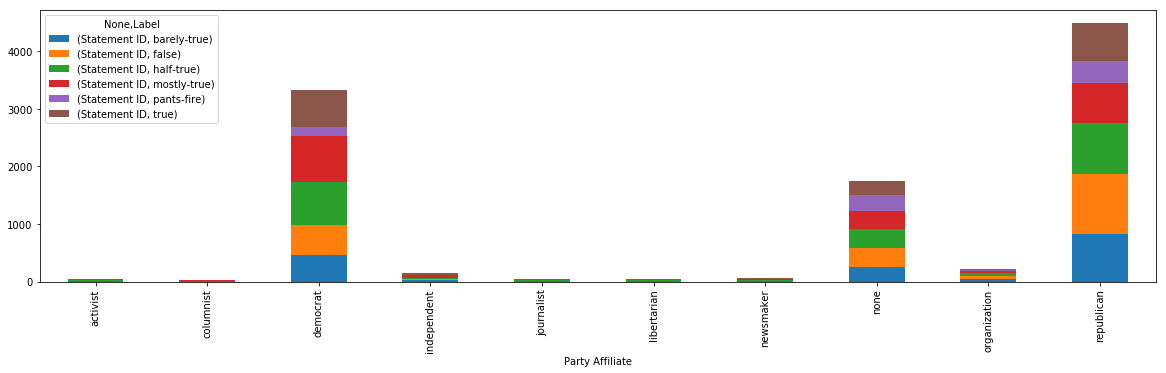

In [85]:
parties_count = parties_df.groupby(["Party Affiliate","Label"]).agg({"Statement ID" : "count"})
parties_count.unstack().plot(kind='bar', stacked=True, figsize=(20,5))

## Sentiment Analysis

An important analysis in this paper states that by considering the  sentiment of the statement in question. The paper considers Sentistrength
library for their purpose.

By ranking the sentiment of the statement from a range of 0 to 5 indicating negative to neutral and to positive, it may give some interesting
insights as to whether a statement is truthful or not

In [74]:
import nltk

In [75]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [76]:
analyzer = SentimentIntensityAnalyzer()


In [77]:
sentiments = pd.DataFrame([analyzer.polarity_scores(row) for row in df_raw.Statement]).join(df_raw)

In [78]:
sentiments.head(5)


,compound,neg,neu,pos,index,Statement ID,Label,Statement,Subject,Speaker,Speaker Job's title,State info,Party Affiliate,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue,Extracted Justification
0,0.0772,0.093,0.772,0.135,1279,6291.json,half-true,Unemployment among Oregon high school graduate...,"economy,jobs,workers",cascade-policy-institute,NaN,NaN,organization,0.0,0.0,1.0,0.0,0.0,a website,"In every data set we checked, Oregons youth un..."
1,-0.2960,0.155,0.845,0.000,4183,5385.json,true,Says Scott Walker enacted the biggest cuts to ...,"education,state-budget,state-finances",kathleen-falk,NaN,NaN,democrat,1.0,3.0,3.0,1.0,0.0,a speech announcing her candidacy,The senator could also be right about illegal ...
2,0.0000,0.000,1.000,0.000,5163,10876.json,barely-true,Says Hillary Clinton makes more per hour at a ...,"income,wealth,workers",glenn-beck,NaN,NaN,none,5.0,7.0,7.0,2.0,6.0,a segment on his radio show,"Obama said the United States has ""recovered fa..."
3,0.3400,0.000,0.821,0.179,5969,2892.json,true,Said Republicans made historic gains in state ...,elections,national-review,NaN,NaN,none,0.0,0.0,0.0,0.0,0.0,National Review Online,The bulk of Obama's professional experience is...
4,0.3182,0.000,0.867,0.133,7146,13399.json,barely-true,Says that hes responsible for Austinincluding ...,"candidates-biography,city-budget,city-governme...",jimmy-flannigan,Small business owner,Texas,none,1.0,0.0,0.0,0.0,0.0,an Austin Monitor interview that day plus foru...,"Club for Growth says Trump promises ""to take c..."


In [79]:
import seaborn as sns


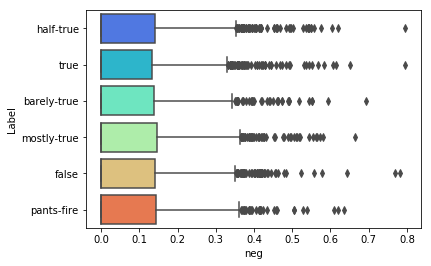

In [81]:
ax = sns.boxplot(x='neg', y='Label', data=sentiments , palette='rainbow')


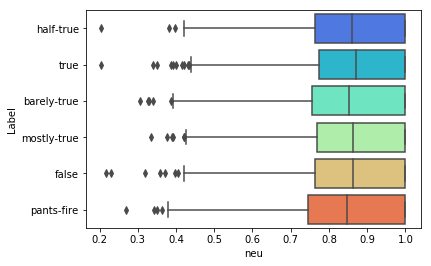

In [82]:
ax = sns.boxplot(x='neu', y='Label', data=sentiments, palette='rainbow')

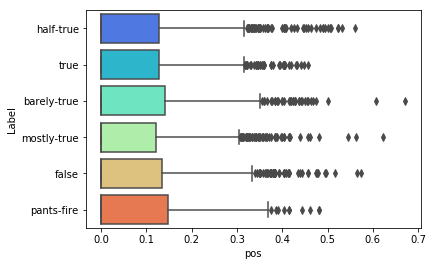

In [83]:
ax = sns.boxplot(x='pos', y='Label', data=sentiments, palette='rainbow')

For each statement, we can extract 4 metrics: negativity, positivity, neutrality and a compound value of all of these metrics.

An interesting observation is that for all 6 available truth labels, all the metrics follow the same distribution, suggesting that the dataset is well balanced in this regard.

-----------------------------------

# Insights

As we see many of the features are important in determining the truthfulness of the statement.

Feature like Venue may also have a contributing factor. A interview may be more misleading than a state speech. 
Or the location may also determine it. A speech given in a remote location may be more misleading than otherwise.

Hence an important aspect is to study the importance of such features and its relationships to build a stronger classifier in future.

Along with that incorporating recent advances in natural language processing like sentiment analysis may also improve in classification results.

# Libraries

* Matplotlib
* Scipy
* Seaborn
* Nltk
* Sklearn
* Pandas





# Code

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://stackoverflow.com/questions/29960558/creating-a-bar-plot-using-seaborn
* https://datascienceplus.com/seaborn-categorical-plots-in-python/
* https://stackoverflow.com/questions/12541370/typeerror-encoding-is-an-invalid-keyword-argument-for-this-function/13867190
* https://stackoverflow.com/questions/45890328/sklearn-metrics-for-multiclass-classification
* https://stackoverflow.com/questions/45890328/sklearn-metrics-for-multiclass-classification
* https://scikit-learn.org/stable/modules/multiclass.html
* https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
